In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [35]:
data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [36]:
data.tail()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [37]:
data.shape

(15509, 10)

In [38]:
data.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [39]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [40]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [14]:
newdata = data.drop(['Name','Year','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1)
newdata.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109 min,7.0,8
2,90 min,NaN,NaN
3,110 min,4.4,35
4,105 min,NaN,NaN


In [18]:
newdata['Duration']=newdata['Duration'].str.replace(' min', '')
newdata['Votes']=newdata['Votes'].replace('$5.16M', 5.16)
newdata['Votes']=newdata['Votes'].str.replace(',', '')
newdata.dropna(subset=['Duration','Votes','Rating'], inplace=True)
newdata.head()


,Duration,Rating,Votes
1,109,7.0,8
3,110,4.4,35
5,147,4.7,827
6,142,7.4,1086
8,82,5.6,326


In [48]:
x=newdata.drop(['Rating'], axis=1)
y=newdata['Rating']

In [49]:
prediction=linear.predict(x_test)
print(r2_score(y_test, lin_pred))

0.028032979070219066


In [50]:
tree=DecisionTreeRegressor(random_state=22)
tree.fit(x_train, y_train)


DecisionTreeRegressor(random_state=22)

In [51]:
prediction=tree.predict(x_test)
print(r2_score(y_test, prediction))

-0.8458911965167992


C:\Users\msara\AppData\Local\Temp\ipykernel_13892\1516657989.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data1['Rating'], color='blue')
C:\Users\mutha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


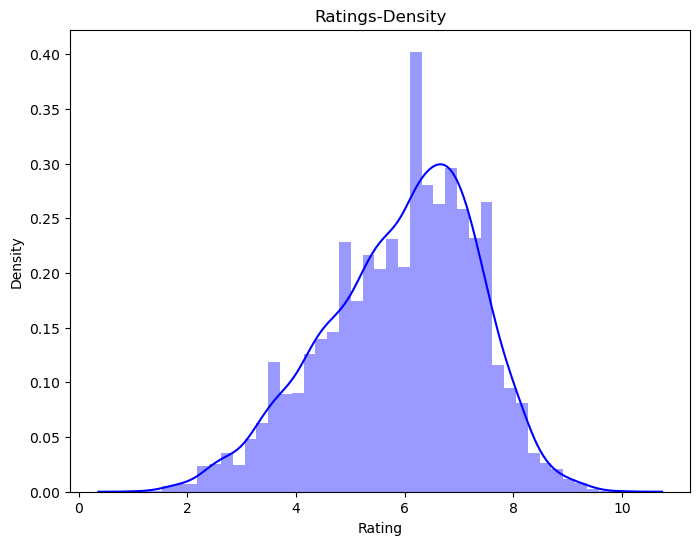

In [71]:
data1=newdata.dropna()
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(8, 6))
sb.distplot(data1['Rating'], color='blue')
plt.title('Ratings-Density')
plt.show()